In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/dataset/trainHP.csv")
data_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/dataset/testHP.csv")
data_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
data_train.shape , data_test.shape

((1460, 80), (1459, 80))

## preprocess

In [ ]:
data_train.drop(['Alley'],axis=1 , inplace=True)

In [ ]:
X_train = data_train[["YearBuilt" , "GarageArea"]].values
Y_train = data_train[["SalePrice"]].values

In [ ]:
X_train.shape,Y_train.shape

((1460, 2), (1460, 1))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2,activation="sigmoid"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(14,activation="tanh"),
    tf.keras.layers.Dense(1,activation="linear") # چون رگرشن است
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
              loss='mae'
              )

In [ ]:
output = model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
46/46 [==============================] - 2s 2ms/step - loss: 180916.3906
Epoch 2/300
46/46 [==============================] - 0s 2ms/step - loss: 180906.7500
Epoch 3/300
46/46 [==============================] - 0s 2ms/step - loss: 180898.9219
Epoch 4/300
46/46 [==============================] - 0s 2ms/step - loss: 180891.4688
Epoch 5/300
46/46 [==============================] - 0s 2ms/step - loss: 180884.2031
Epoch 6/300
46/46 [==============================] - 0s 2ms/step - loss: 180877.0156
Epoch 7/300
46/46 [==============================] - 0s 2ms/step - loss: 180869.8750
Epoch 8/300
46/46 [==============================] - 0s 2ms/step - loss: 180862.7656
Epoch 9/300
46/46 [==============================] - 0s 2ms/step - loss: 180855.7188
Epoch 10/300
46/46 [==============================] - 0s 2ms/step - loss: 180848.6719
Epoch 11/300
46/46 [==============================] - 0s 2ms/step - loss: 180841.6406
Epoch 12/300
46/46 [==============================] - 0s 2ms/st

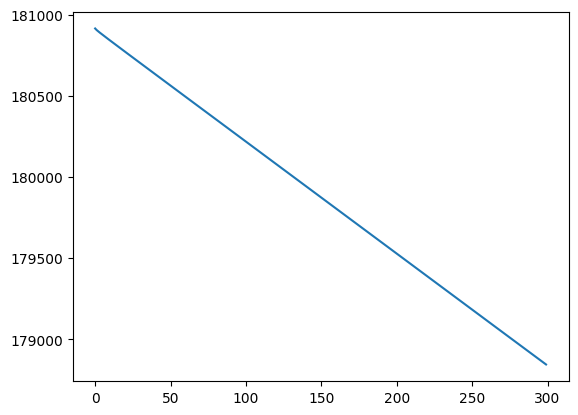

In [ ]:
plt.plot(output.history["loss"])
plt.show()

In [ ]:
X_test = data_test[["YearBuilt" , "GarageArea"]].values
Y_test = data_test[["SalePrice"]].values

KeyError: ignored

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
my_house = np.array([[2016,1]])
model.predict(my_house)

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/khadijeh_model.h5")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/khadijeh_model.h5")

In [ ]:
my_house = np.array([[2016,1]])
model.predict(my_house)